### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

FORMA: 1.0529
VARIANZA: 1.1601
0 1.0316978560883652 1.160140436783569


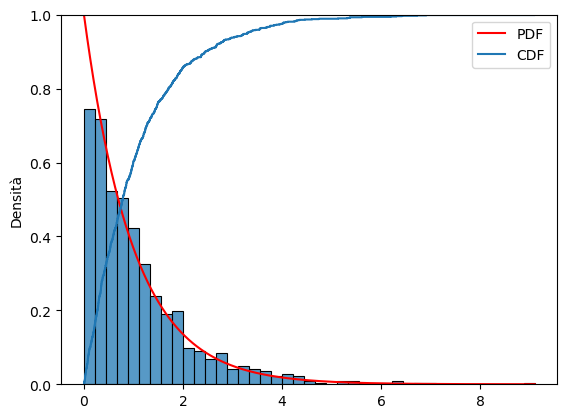

In [1]:
import numpy as np
import scipy as sc
from scipy import stats
from math import *
import matplotlib as ma
import matplotlib.pyplot as plt
import seaborn as se

def vari(a, x): #funzione per calcolare la varianza
    som = 0
    for i in range(len(a)):
        som = som + (a[i] - x)**2
    vaar = som/len(a)
    return vaar

gama = stats.gamma.rvs(a = 1, size = 1000) #1000 elementi dalla distrubuzione gamma
se.histplot(gama, stat="density") #istogramma
ls = np.linspace(0, gama.max(), 1000)
pdf = stats.gamma.pdf(ls, a=1) #crea la funzione densità su un linspace di 1000 valori
plt.ylabel("Densità")
#plotta la funzione densità
plt.plot(ls, pdf, "r-", label = "PDF")

fit_shape, fit_loc, fit_scale = stats.gamma.fit(gama, floc=0)
print("FORMA: %.4f" % fit_shape)
print("VARIANZA: %.4f" % vari(gama, np.mean(gama)))

#plotta la funzione di ripartizione
se.ecdfplot(gama, label = "CDF")
plt.legend()
print(fit_loc, fit_scale, np.var(gama)) #parametri richiesti

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

[ 0  1  2  3  4  5  6  7  8  9 10 11]


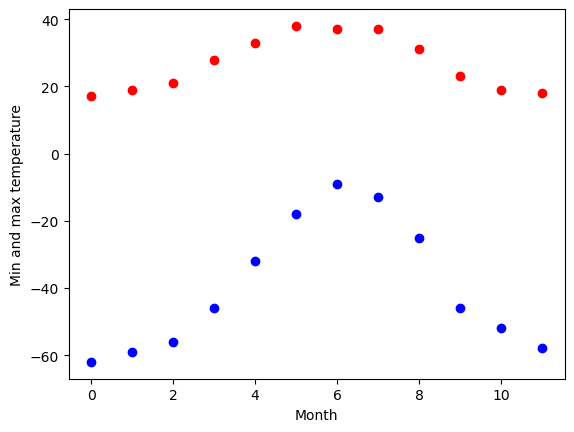

In [3]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
mesi = np.arange(12)
plt.plot(mesi, temp_max, "ro")
plt.plot(mesi, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
print(mesi)


MAE di temp_max: 2.5818
RMSE di temp_max: 2.9602
MAE di temp_min: 2.9570
RMSE di temp_min: 3.4879


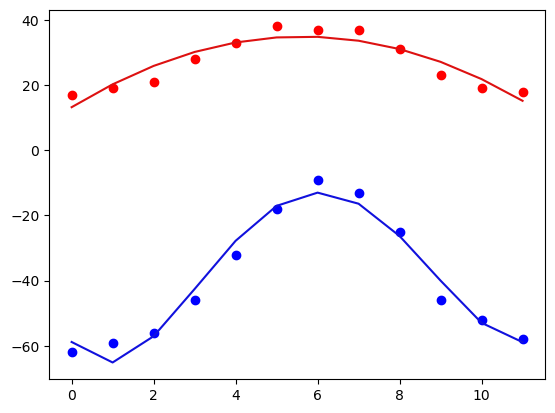

In [ ]:
def mae(a, x, powerr): #funzione congiunta per calcolare il MAE e RMSE
    som = 0
    for i in range(len(a)):
        som = (abs(a[i] - x[i])**powerr) + som
    maee = (som * (1/len(a)))**(1/powerr)
    return maee


#forse la scelta ideale sarebbe stata la funzione seno (o coseno)
a, b, c = np.polyfit(mesi, temp_max, 2)
h, g, d, e, f = np.polyfit(mesi, temp_min, 4) #con grado 2 ne` con grado 3 non era chissache`
polyfmax = a * mesi**2 + b * mesi + c
polyfmin = h * mesi**4 + g * mesi**3+ d * mesi**2 + e * mesi + f

#plotta i valori
plt.scatter(mesi, temp_max, color = "#FF0000")
plt.scatter(mesi, temp_min, color = "#0000FF")
plt.plot(polyfmax, color = "#DD1111")
plt.plot(polyfmin, color = "#1111DD")

print("MAE di temp_max: %.4f" % mae(temp_max, polyfmax, 1))
print("RMSE di temp_max: %.4f" % mae(temp_max, polyfmax, 2))
print("MAE di temp_min: %.4f" % mae(temp_min, polyfmin, 1))
print("RMSE di temp_min: %.4f" % mae(temp_min, polyfmin, 2))



### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

In [64]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
df = df.sort_values("mpg") #ho sortato il dataframe per il consumo
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4


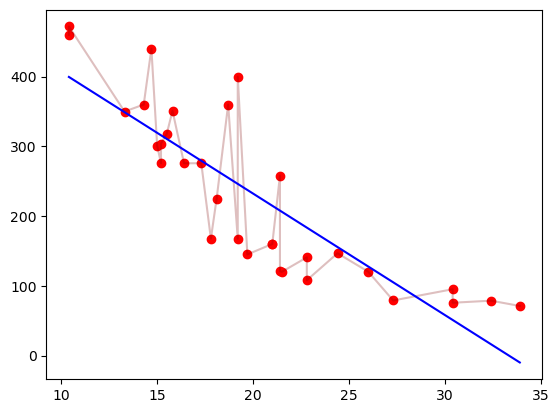

In [ ]:
#creo la regressione lineare
m, g, r, p, errore = sc.stats.linregress(df["mpg"], df["disp"])
scfitlin = m * df["mpg"] + g
plt.scatter(df["mpg"], df["disp"], color = "#FF0000")
plt.plot(df["mpg"], df["disp"], color = "#7F0000", alpha = 0.25)
plt.plot(df["mpg"], scfitlin, color = "#0000FF")